In [153]:
import numpy as np
from numpy import ndarray

from numba import njit, prange


@njit(parallel=False, cache=True)
def bool_array_to_float(
    bool_array: ndarray,
    interval: tuple = (-2, 2),
    ftol: float = 1e-7,
    correct: bool = False,
) -> float:
    alltrue = True
    allfalse = True
    for i in range(len(bool_array)):
        if bool_array[i]:
            allfalse = False
            interval = interval[0] / 2, interval[1]
        else:
            alltrue = False
            interval = interval[0], interval[1] / 2

    if np.abs(interval[1] - interval[0]) < ftol:
        average = 0
    else:
        average = interval[0] / 2 + interval[1] / 2

    if correct:
        if alltrue:
            average = interval[1]
        elif allfalse:
            average = interval[0]

        is_close_to_yero = np.abs(interval[1] - interval[0]) < ftol
        average = 0.0 if is_close_to_yero else average

    return average

In [154]:
@njit(parallel=True, cache=True)
def generate(out:ndarray, n:int=8, interval:tuple=(-1, 1), ftol: float = 0.001):
    """boolarray = np.full(n, True, dtype=bool)
    out[0] = bool_array_to_float(boolarray, interval, ftol)
    boolarray = np.full(n, False, dtype=bool)
    out[1] = bool_array_to_float(boolarray, interval, ftol) """
    for i in prange(out.shape[0]):
        boolarray = np.random.rand(n) > 0.5
        out[i] = bool_array_to_float(boolarray, interval, ftol, True)

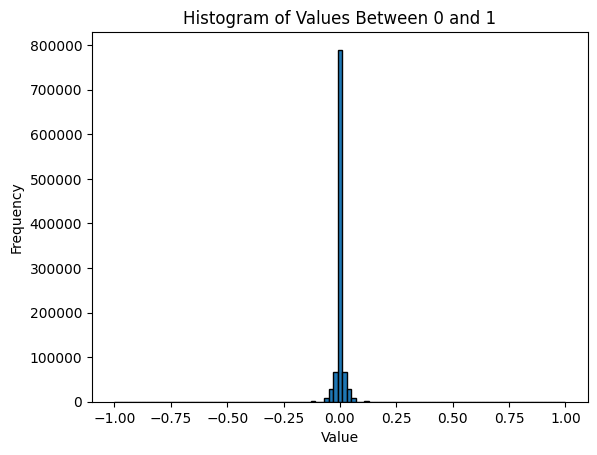

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Example list of values between -1 and 1
samples=np.zeros(1000000)
generate(samples, 16, (-1, 1), 1e-12)

# Creating the histogram
plt.hist(samples, bins=101, edgecolor='black')  # 1000 bins for histogram

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values Between 0 and 1')

# Showing the plot
plt.show()



In [156]:
samples

array([-0.01538086,  0.01538086,  0.        , ...,  0.00732422,
        0.00292969,  0.        ])